Digit Recognition using Lasso Logistic Model

In [2]:
from sklearn.datasets import fetch_openml
X,y=fetch_openml('mnist_784',version=1,return_X_y=True, as_frame=False)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

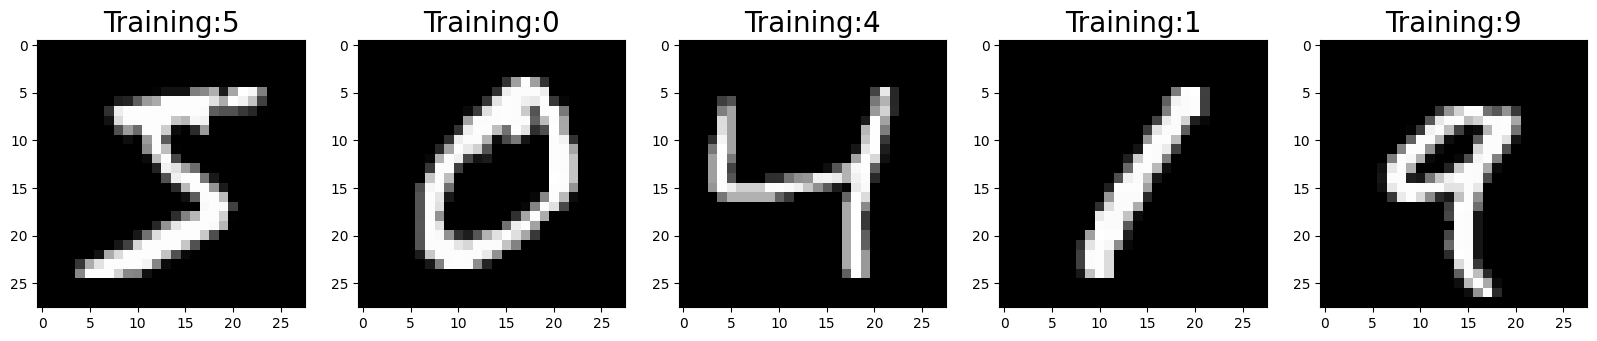

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, image in enumerate(X[:5]):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image,(28,28)), cmap=plt.cm.gray)
    plt.title('Training:' + y[index], fontsize = 20)

In [6]:
from sklearn.model_selection import train_test_split
y=[int(i) for i in y]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/7.0,random_state=0)

In [43]:
X_test.shape

(10000, 784)

In [8]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(fit_intercept=True, multi_class='auto', penalty='l1', solver='saga', max_iter=1000, C=50, verbose=2,n_jobs=5,tol=0.1)
model

LogisticRegression(C=50, max_iter=1000, n_jobs=5, penalty='l1', solver='saga',
                   tol=0.1, verbose=2)

In [9]:
model.fit(X_train,y_train)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


convergence after 5 epochs took 91 seconds


[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:  1.5min finished


LogisticRegression(C=50, max_iter=1000, n_jobs=5, penalty='l1', solver='saga',
                   tol=0.1, verbose=2)

In [10]:
model.score(X_train,y_train)

0.9298333333333333

In [11]:
model.score(X_test,y_test)

0.9178

In [40]:
from sklearn import metrics
y_test_pred=model.predict(X_test)
y_test_pred

array([0, 4, 1, ..., 1, 3, 0])

In [13]:
p=y_test==y_test_pred
p

array([ True,  True,  True, ...,  True,  True,  True])

In [14]:
import collections
def CountFrequency(arr):
	return collections.Counter(arr)
if __name__ == "__main__":
	freq = CountFrequency(p)
	for (key, value) in freq.items():
		print (key, " -> ", value)


True  ->  9178
False  ->  822


In [15]:
cm=metrics.confusion_matrix(y_true=y_test,y_pred=y_test_pred,labels=model.classes_)

Text(0.5, 23.52222222222222, 'Predicted')

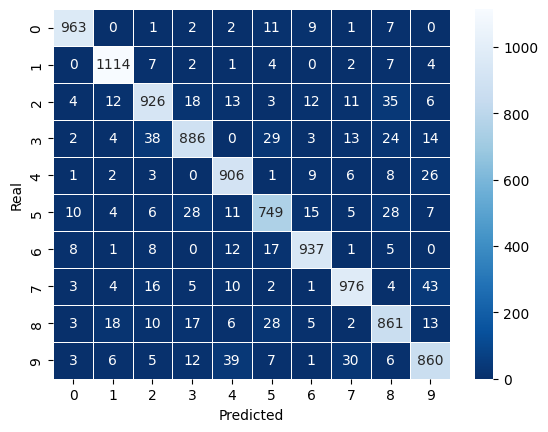

In [16]:
import seaborn as sns
sns.heatmap(cm, annot=True, linewidths=0.5, cmap='Blues_r', fmt='0.4g')
plt.ylabel('Real')
plt.xlabel('Predicted')

Check for classified & misclassified images

In [17]:
index = 0
misclassified_images = []
classified_images = []
for label, predict in zip(y_test, y_test_pred):
    if label != predict: 
        misclassified_images.append(index)
    else:
        classified_images.append(index)
    index +=1
    
    if len(misclassified_images) == 10:
        break

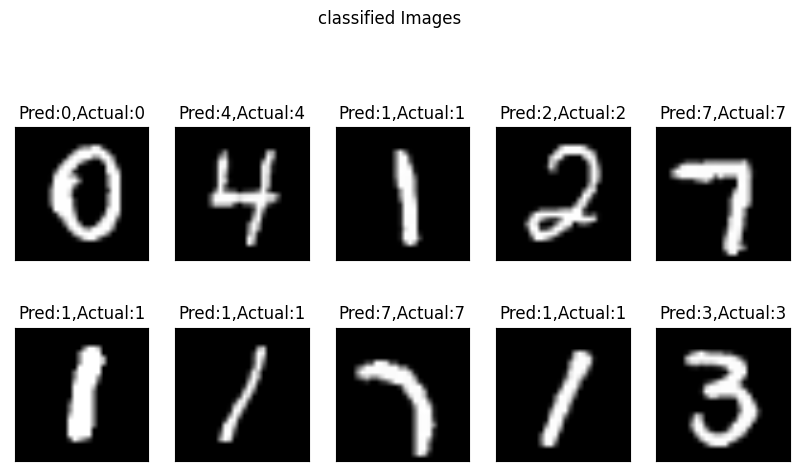

In [18]:
plt.figure(figsize=(10,10))
plt.suptitle('classified Images')
for plot_index,bad_index in enumerate(classified_images[:10]):
    p=plt.subplot(4,5,plot_index+1)
    p.imshow(X_test[bad_index].reshape(28,28), cmap=plt.cm.gray, interpolation='bilinear')
    p.set_yticks(())
    p.set_xticks(())
    p.set_title(f'Pred:{y_test_pred[bad_index]},Actual:{y_test[bad_index]}')

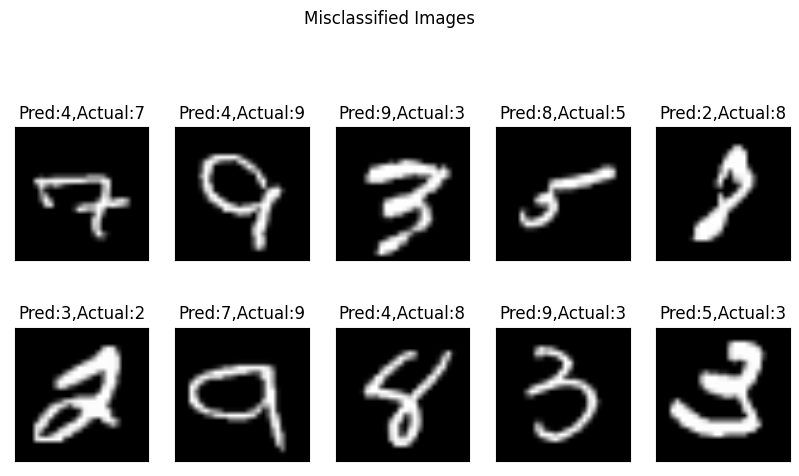

In [19]:
plt.figure(figsize=(10,10))
plt.suptitle('Misclassified Images')
for plot_index,bad_index in enumerate(misclassified_images):
    p=plt.subplot(4,5,plot_index+1)
    p.imshow(X_test[bad_index].reshape(28,28), cmap=plt.cm.gray, interpolation='bilinear')
    p.set_yticks(())
    p.set_xticks(())
    p.set_title(f'Pred:{y_test_pred[bad_index]},Actual:{y_test[bad_index]}')

    

In [20]:
coef=model.coef_.copy()
scale=np.abs(coef).max()

Text(0.5, 0.98, 'Coefficients for various classes')

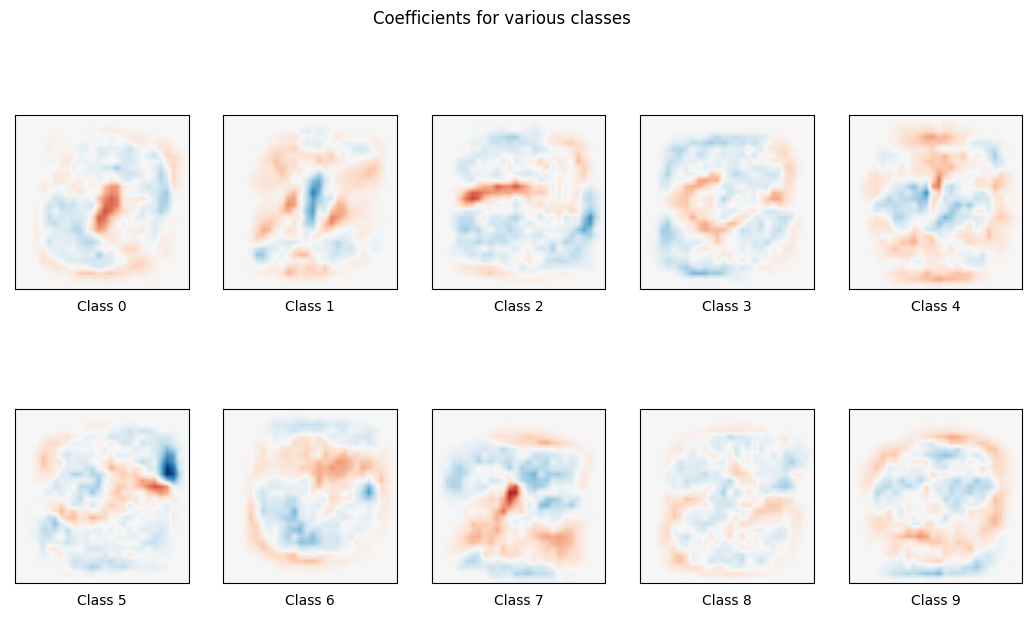

In [21]:
plt.figure(figsize=(13,7))
for i in range(10):
    coef_plot=plt.subplot(2,5,i+1)
    coef_plot.imshow(coef[i].reshape(28,28),cmap=plt.cm.RdBu, vmin=-scale, vmax=scale, interpolation='bilinear')
    coef_plot.set_xticks(())
    coef_plot.set_yticks(())
    coef_plot.set_xlabel(f'Class {i}')
plt.suptitle('Coefficients for various classes')